## Exercise 1: The Diabetes Dataset

<img src="https://assets.newatlas.com/dims4/default/829f59f/2147483647/strip/true/crop/7360x4907+0+3/resize/1200x800!/quality/90/?url=http%3A%2F%2Fnewatlas-brightspot.s3.amazonaws.com%2F10%2F7f%2F5e48f79245c0b831a58d7cf8fb1d%2Fdepositphotos-228244172-xl.jpg" alt=" " width="300"/>


The structure of this assignment follows the project architecture that was presented in the Data Science Master's program's sixth lecture. It was designed in collaboration with "The Diabetes Dataset." Using this template guarantees an organized and methodical approach to machine learning in the context of diabetes data analysis. Emphasizing the need for accurate data at every stage as specified in the project design, the exercise uses the Diabetes dataset to accomplish this goal. The thorough explanation of every stage ensures that the goals of the exercise are met by providing the necessary answers and context-relevant insights for the dataset. This accurate approach guarantees a thorough grasp of the machine learning process and its practical application in real-world circumstances, with a specific focus on diabetes data.


Diabetes is a chronic illness that affects the body's capacity to metabolize food into energy for an extended period of time. Most food that is consumed is converted by the body into glucose, or sugar, which is then released into the bloodstream. The elevated glucose concentration that results from elevated blood sugar levels prompts the pancreas to release insulin.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes    # the dataset of the diabetes dataset
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from pandas.plotting import scatter_matrix
import xgboost as xgboost
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### The Dataset

In [2]:
diabetes = load_diabetes()
print('The dataset of "The Diabetes Dataset" looks like :')
print(diabetes)

The dataset of "The Diabetes Dataset" looks like :
{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190.,

In [3]:
df_diabetes = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


From scikit learn we can see each attribute corresponds to these types of data :
- age : age in years
- sex
- bmi : body mass index
- bp : average blood pressure
- s1 : total serum cholesterol (tc)
- s2 : low-density lipoproteins (ldl)
- s3 : high-density lipoproteins (hdl)
- s4 : total cholesterol / HDL (tch)
- s5 : possibly log of serum triglycerides level (ltg)
- s6 : blood sugar level(glu)

It is observed also that the values of each column has weird number. For example the column age has negative or decimal values. That happens because each of the 10 feature variables have been mean centered and scaled by the standard deviation times 'n_samples'.

In [4]:
df_diabetes = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df_diabetes.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [5]:
df_diabetes['target'] = diabetes.target
df_diabetes.head(10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


### The dimensions of the dataset 

In [6]:
print('The dimensions of the dataset are :')
df_diabetes.shape

The dimensions of the dataset are :


(442, 11)

The above numbers are describing the numbers of rows and columns, respectively. So, the dataset have 442 rows which means 442 number of instances and each instance corresponds to a person. 10 the number of attributes without target column plus the target column. 

### A peek at the dataset

In [7]:
print('Some information about the "Diabetes Dataset" : ')
df_diabetes.dtypes

Some information about the "Diabetes Dataset" : 


age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

All the types here are numerical, but as it is observed above the values of attribute sex are only two, which means that this attribute is categorical. 

In [8]:
print('checking for missing values (how many missing values there are in each column')
df_diabetes.isnull().sum()

checking for missing values (how many missing values there are in each column


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Luckily we don't have any missing value.

In [9]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [10]:
df_diabetes.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,57.0


### Statistical summary of all attributes

With the command below we will have a dataframe which will show us :
- Count: how many values the attribute has
- Mean: the mean of all values of the attribute
- Standard Deviation: the amount of variation values have. Low 
 means values are closer to the mean
- Minimum value
- 25th Percentile: the value under which 25% of the instances can be found
- 50th Percentile: the value under which 50% of the instances can be found (also called the median, is the value that splits the distribution in half)
- 75th Percentile: the value under which 75% of the instances can be found
- Maximum value

In [11]:
df_diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


### The Target distribution 

In [12]:
df_diabetes.groupby('target').size()

target
25.0     1
31.0     1
37.0     1
39.0     2
40.0     1
        ..
321.0    1
332.0    1
336.0    1
341.0    1
346.0    1
Length: 214, dtype: int64

In this case it is a little bit difficult to understand and group the target. So, this will be answered it further below with some graphs.

(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <BarContainer object of 10 artists>)

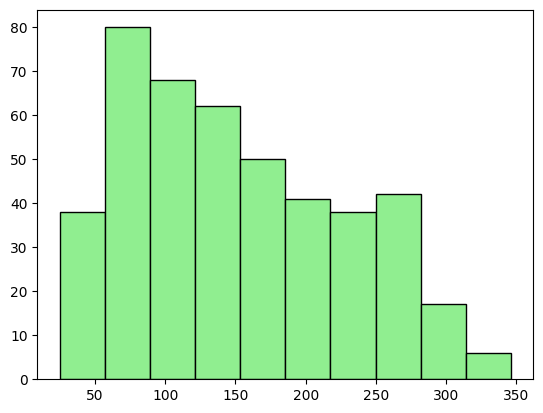

In [13]:
plt.hist(df_diabetes['target'], color='lightgreen', edgecolor='black')

<Axes: xlabel='target', ylabel='Density'>

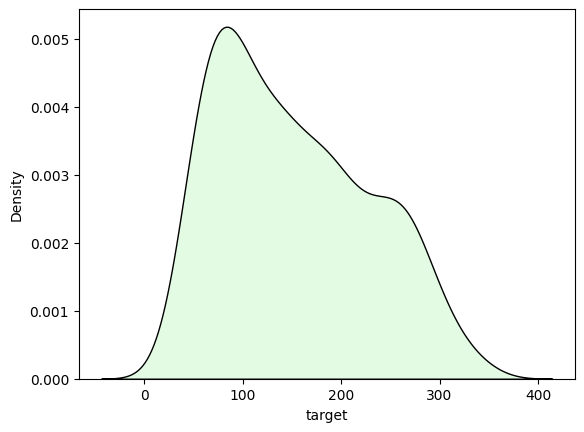

In [14]:
sns.kdeplot(data=df_diabetes, x='target', fill=True, color='lightgreen', edgecolor='black')

<Axes: ylabel='target'>

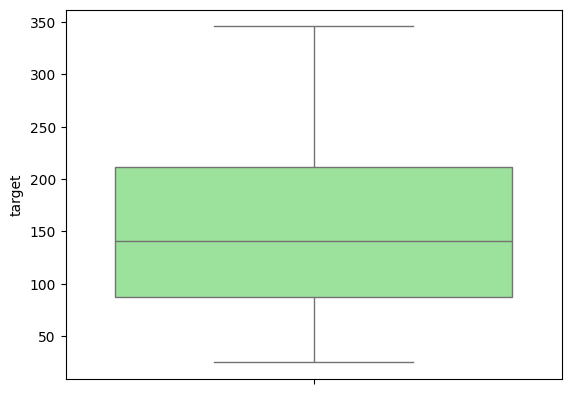

In [15]:
sns.boxplot(y=df_diabetes['target'],  color='lightgreen')

Skewness

A statistical metric known as skewness is used to characterize the asymmetry or lack of symmetry in a data distribution. The distribution's left and right sides are mirror reflections of one another, and its skewness is 0 in a perfectly symmetrical distribution. On the other hand, a skewed distribution suggests that the distribution's tails are not balanced. 

The skewness value can provide insights into the shape of the distribution:

- If skewness is zero, the data is perfectly symmetrical.
- If skewness is positive, the distribution has a tail on the right side (right-skewed or positively skewed).
- If skewness is negative, the distribution has a tail on the left side (left-skewed or negatively skewed).

In [16]:
df_diabetes.skew()

age      -0.231382
sex       0.127385
bmi       0.598148
bp        0.290658
s1        0.378108
s2        0.436592
s3        0.799255
s4        0.735374
s5        0.291754
s6        0.207917
target    0.440563
dtype: float64

It is observed that The most of the values above are positive. This means that on the graphs the distribution will be on the left side and the tail on the right side and the graphs presented below clearly demonstrate this tendency.

### Univariate plots  

#### histogram

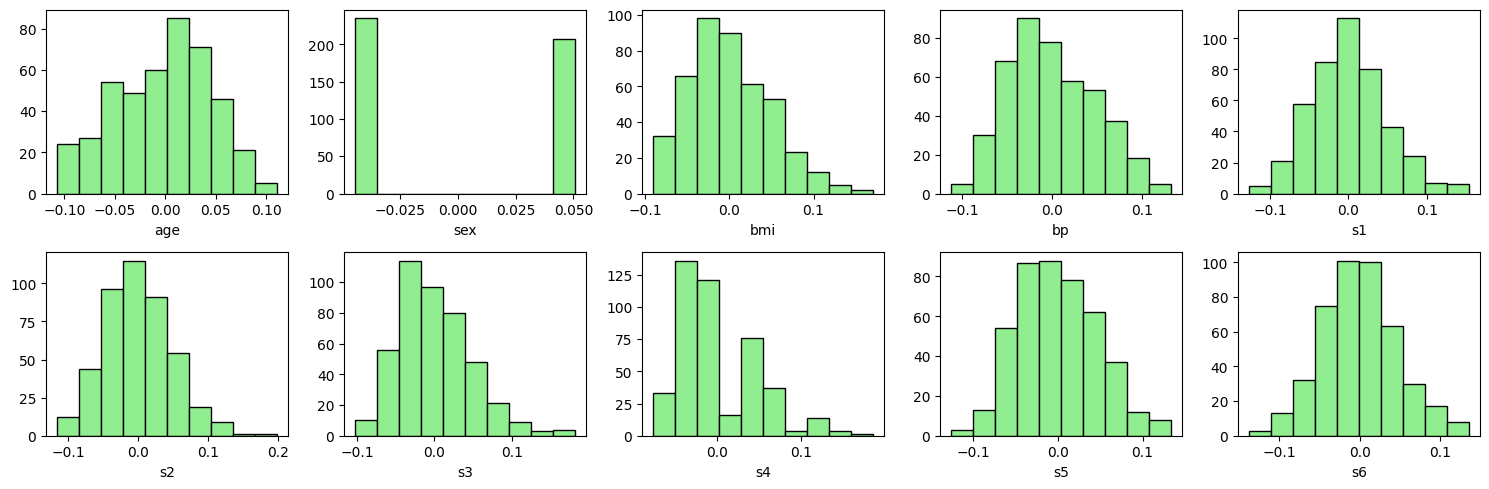

In [17]:
attributes = df_diabetes.columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 5))
axes = axes.flatten()

for i, attribute in enumerate(attributes[:-1]):
    axes[i].hist(df_diabetes[attribute], bins=10, color='lightgreen', edgecolor='black')
    axes[i].set_xlabel(f'{attribute}')

plt.tight_layout()
plt.show()

#### density plots

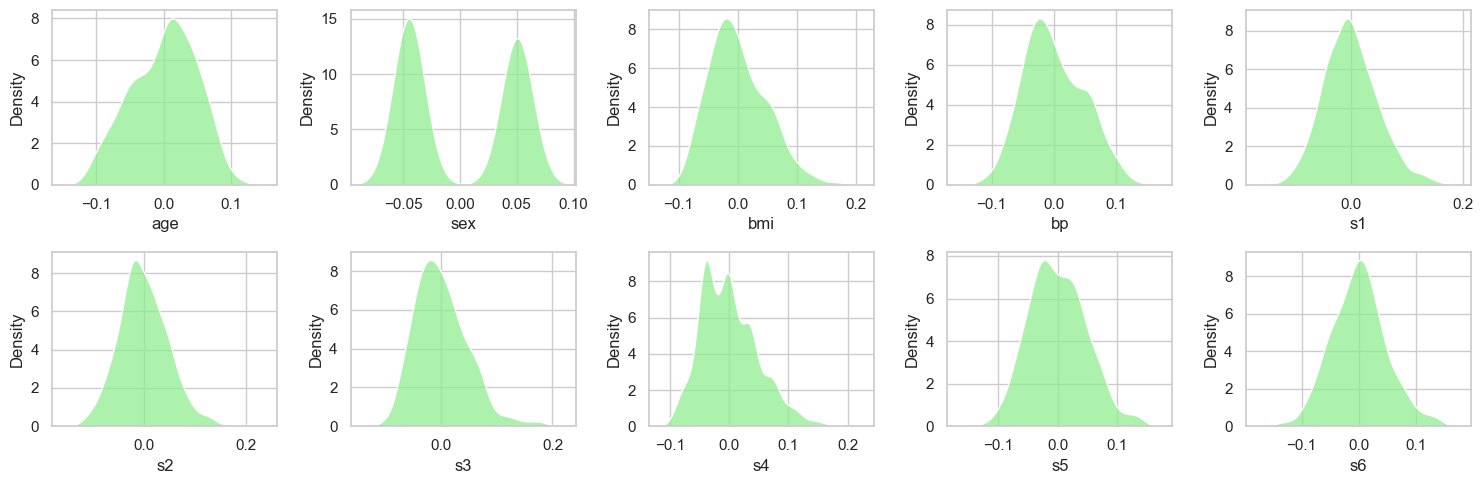

In [18]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 5))
axes = axes.flatten()

for i, attribute in enumerate(attributes[:-1]):
    sns.kdeplot(data=df_diabetes, x=attribute, fill=True, color='lightgreen', ax=axes[i], multiple='stack')
    axes[i].set_xlabel(f'{attribute}')

plt.tight_layout()
plt.show()

#### whisker plots

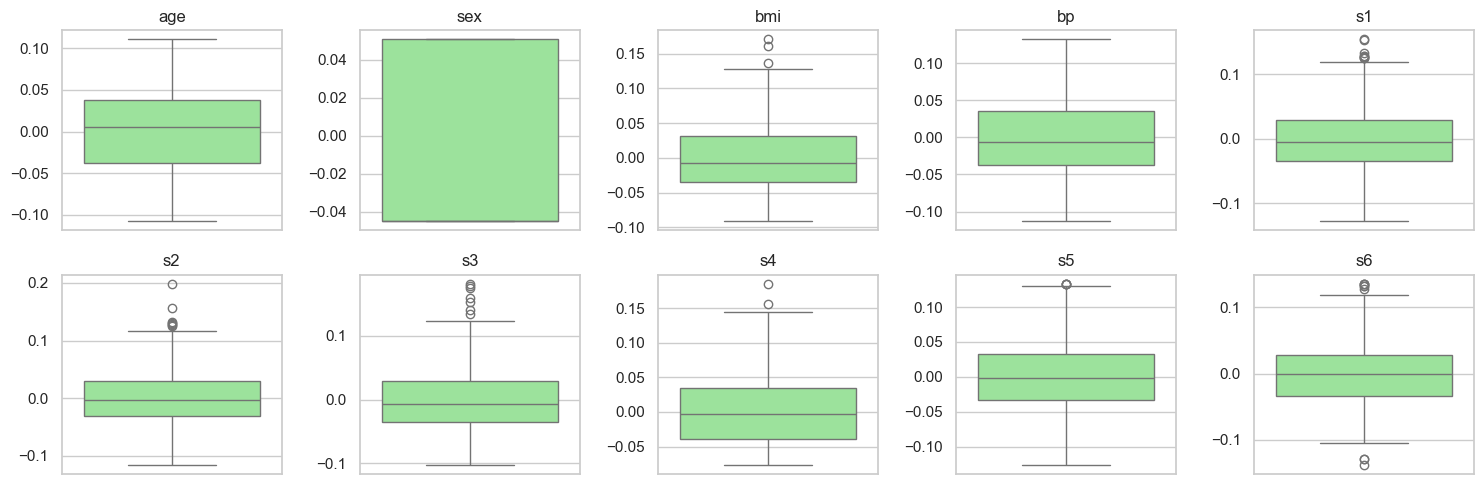

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 5))
axes = axes.flatten()

for i, attribute in enumerate(attributes[:-1]):
    sns.boxplot(y=df_diabetes[attribute], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'{attribute}')
    axes[i].set_xlabel('')  
    axes[i].set_ylabel('')  

plt.tight_layout()
plt.show()

Extra plots

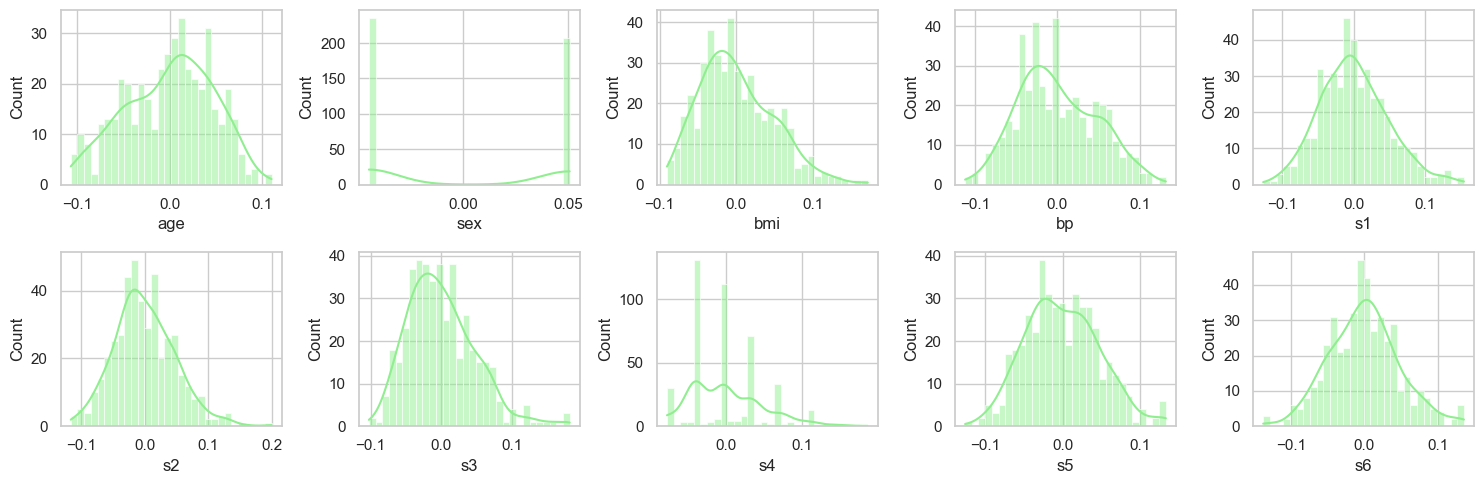

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 5))
axes = axes.flatten()
for i, x in enumerate(df_diabetes.columns[:-1]):  # in that way we exclude the last column which is the diagnoses 
    sns.histplot(df_diabetes[x], kde=True, color='lightgreen', bins=30, ax=axes[i])
    axes[i].set_xlabel(x)
plt.tight_layout()

### Multivariate plots

#### scatter plot matrix

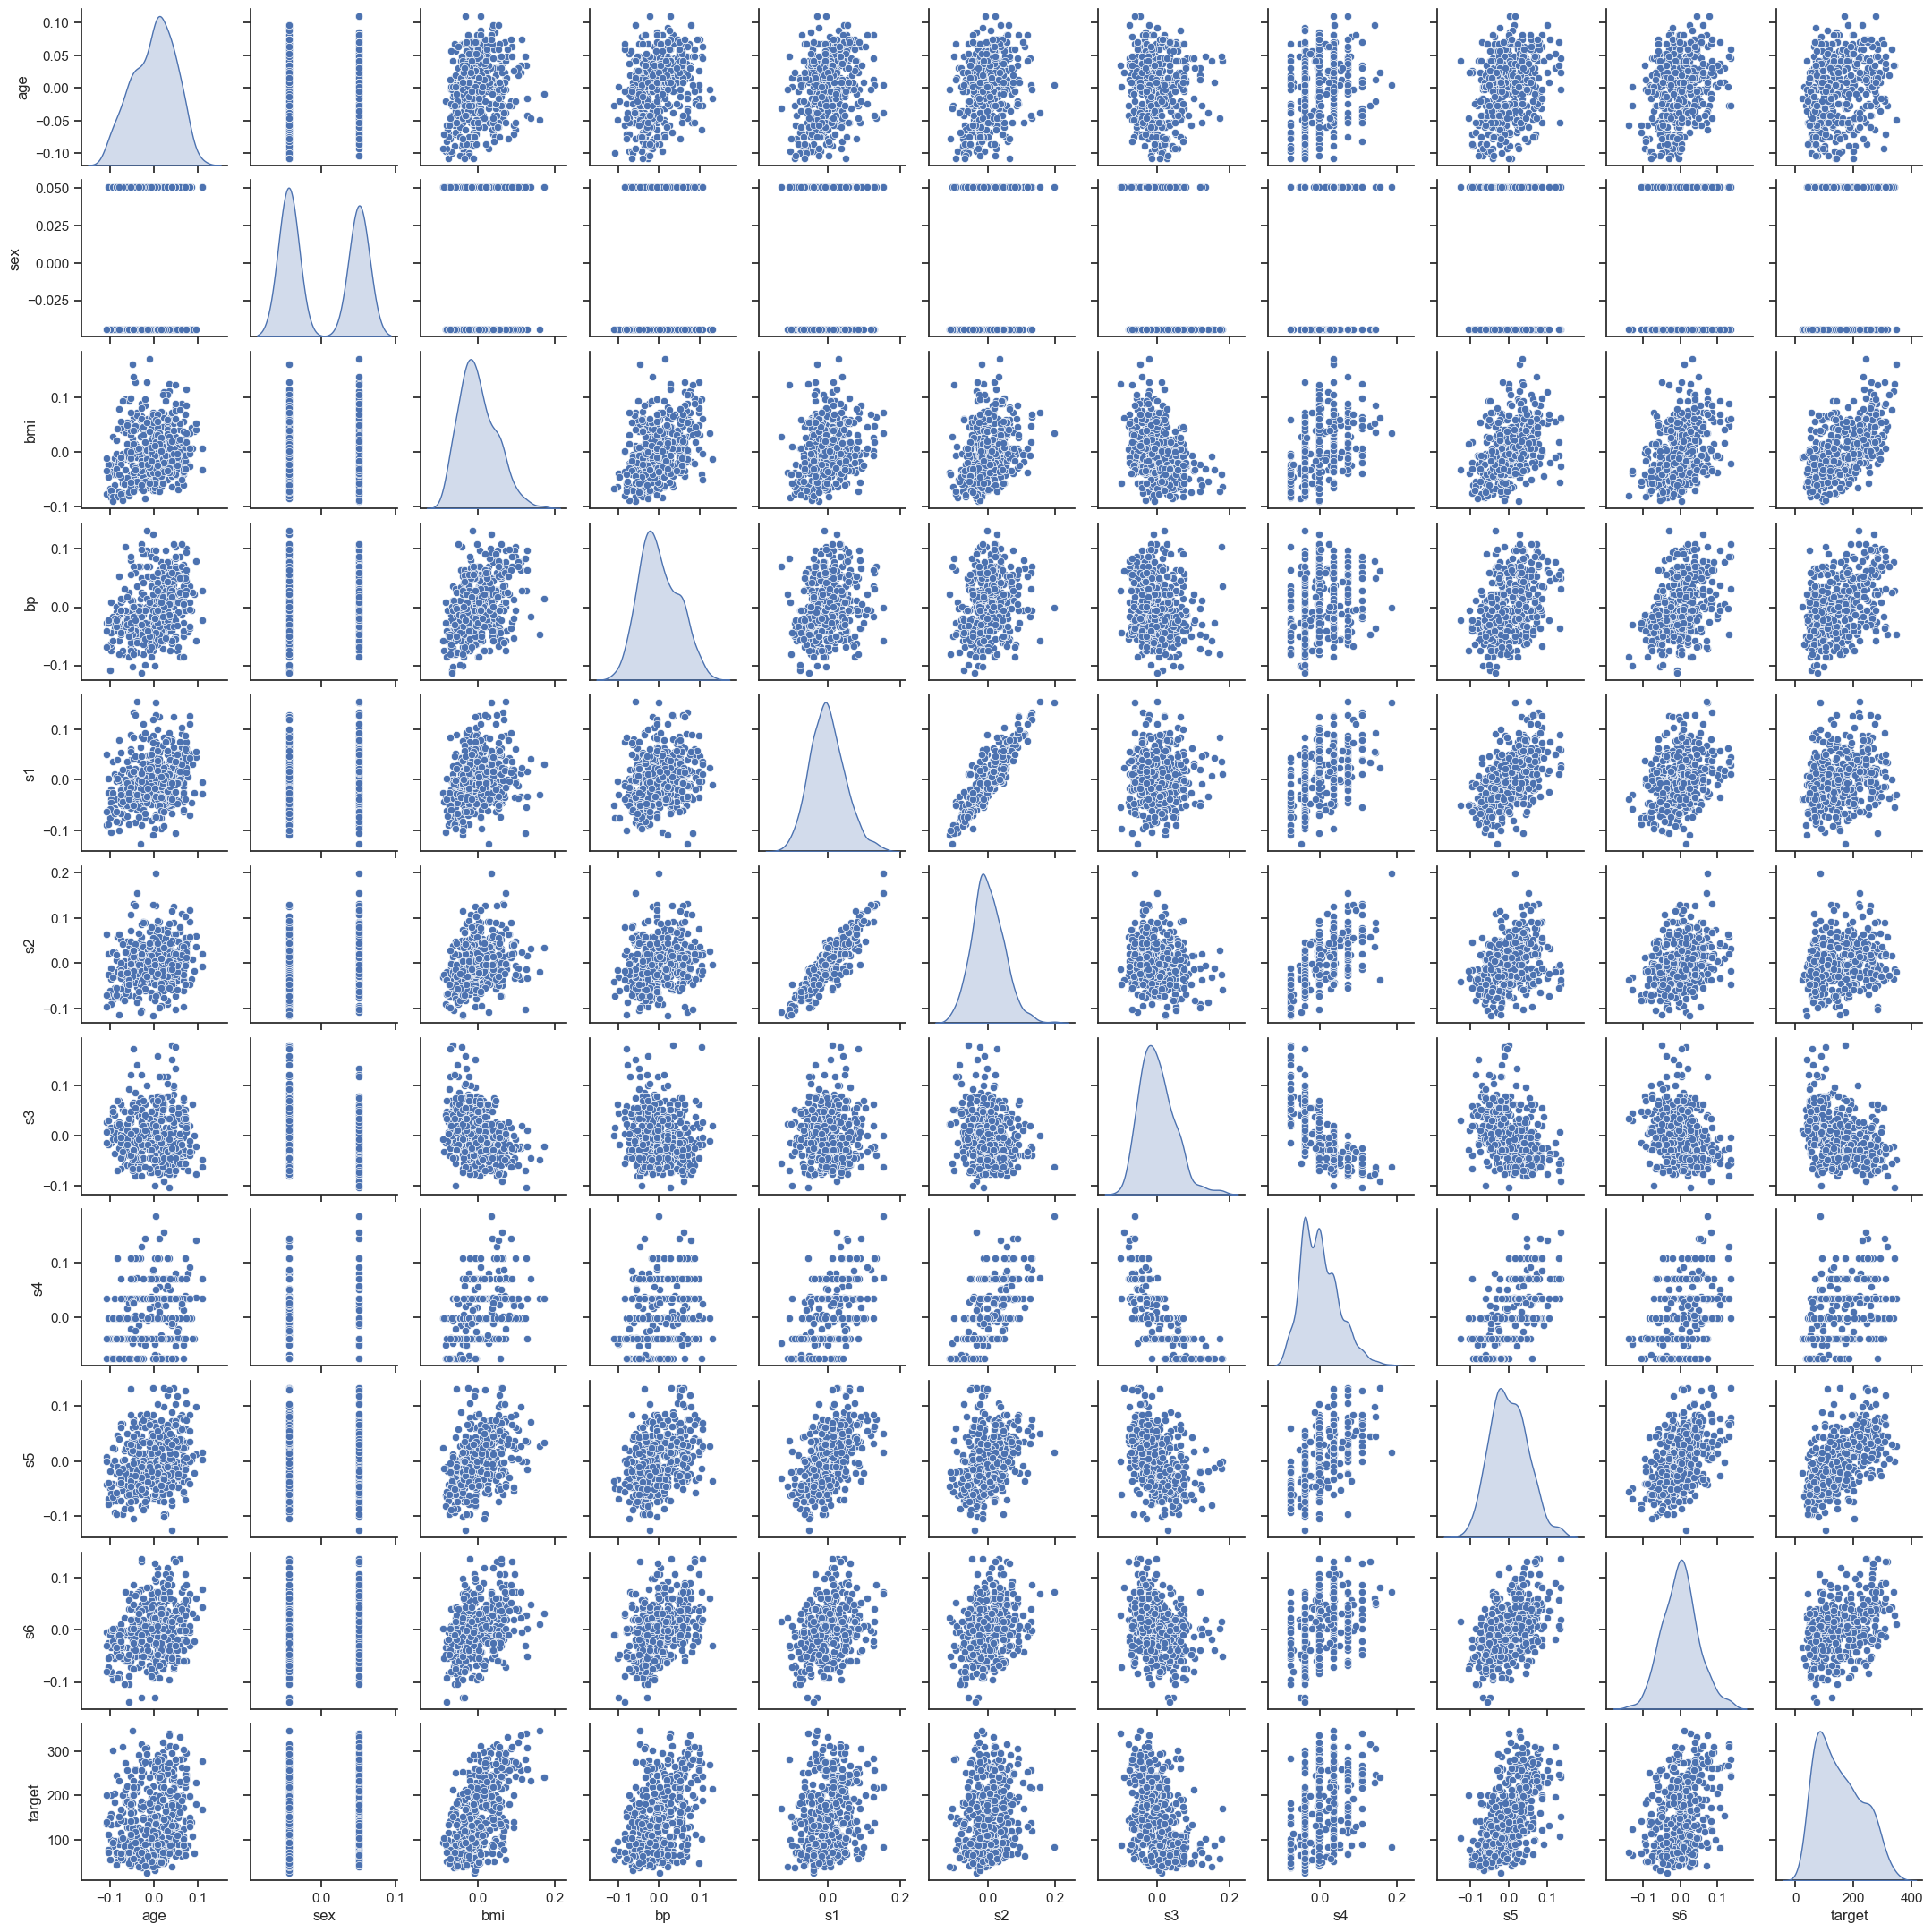

In [21]:
sns.set(style="ticks")
sns.pairplot(df_diabetes[attributes], height=2, diag_kind="kde")

In [22]:
df = df_diabetes.drop(columns='target', axis=1 )

Box Plot of all attributes

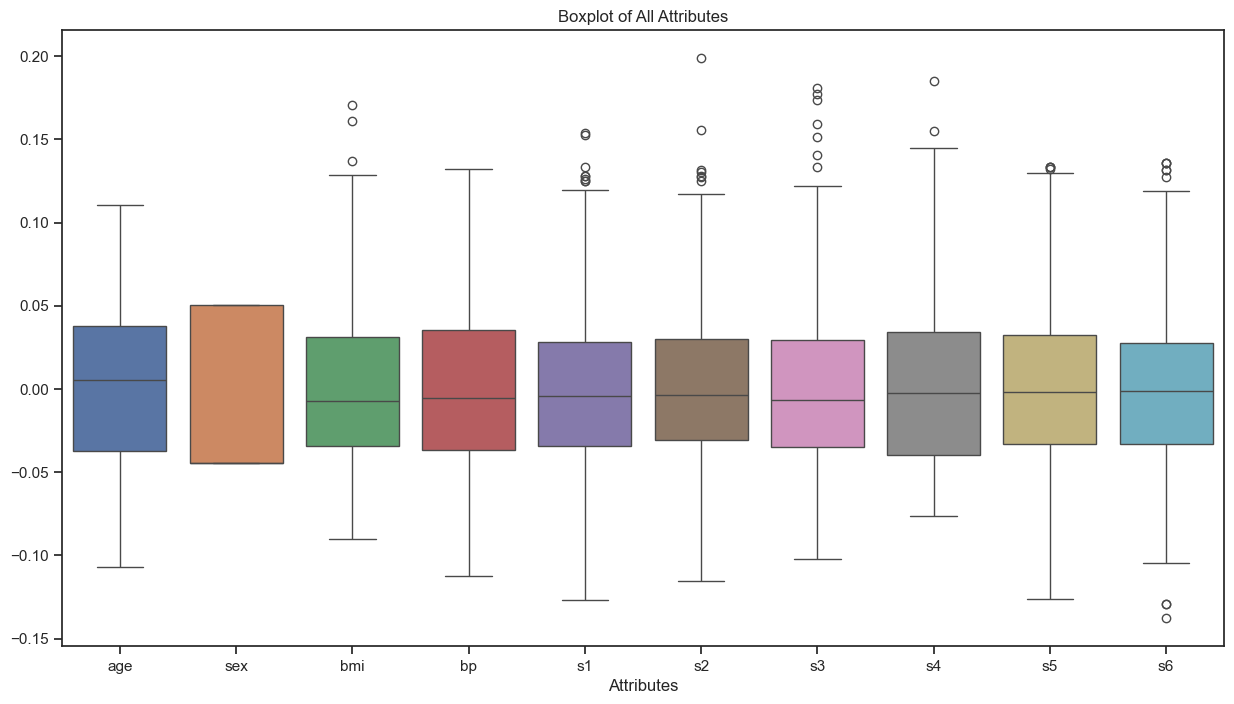

In [23]:
plt.figure(figsize=(15, 8))  # Adjust the figure size if needed
sns.boxplot(data=df, orient='v')  # 'orient' specifies horizontal boxplots

# Set plot labels and title
plt.xlabel('Attributes')
plt.title('Boxplot of All Attributes')

# Show the plot
plt.show()

#### correlations between attributes 

The correlation is a value that indicates the strength of the relationship between variables. The coefficient can take any values from -1 to 1. The interpretations of the values are:

- -1     : Perfect negative correlation. The variables tend to move in opposite directions (i.e., when one variable increases, the other variable decreases).
- (-1,0) : The variables tend to move in opposite directions (i.e., when one variable increases, the other variable decreases).
- 0      :     No correlation. The variables do not have a relationship with each other.
- (0,1)  :  The variables tend to move in the same direction (i.e., when one variable increases, the other variable also increases).
- 1      :      Perfect positive correlation. The variables tend to move in the same direction (i.e., when one variable increases, the other variable also increases).

In [24]:
df_diabetes.corr(method='pearson')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<Axes: >

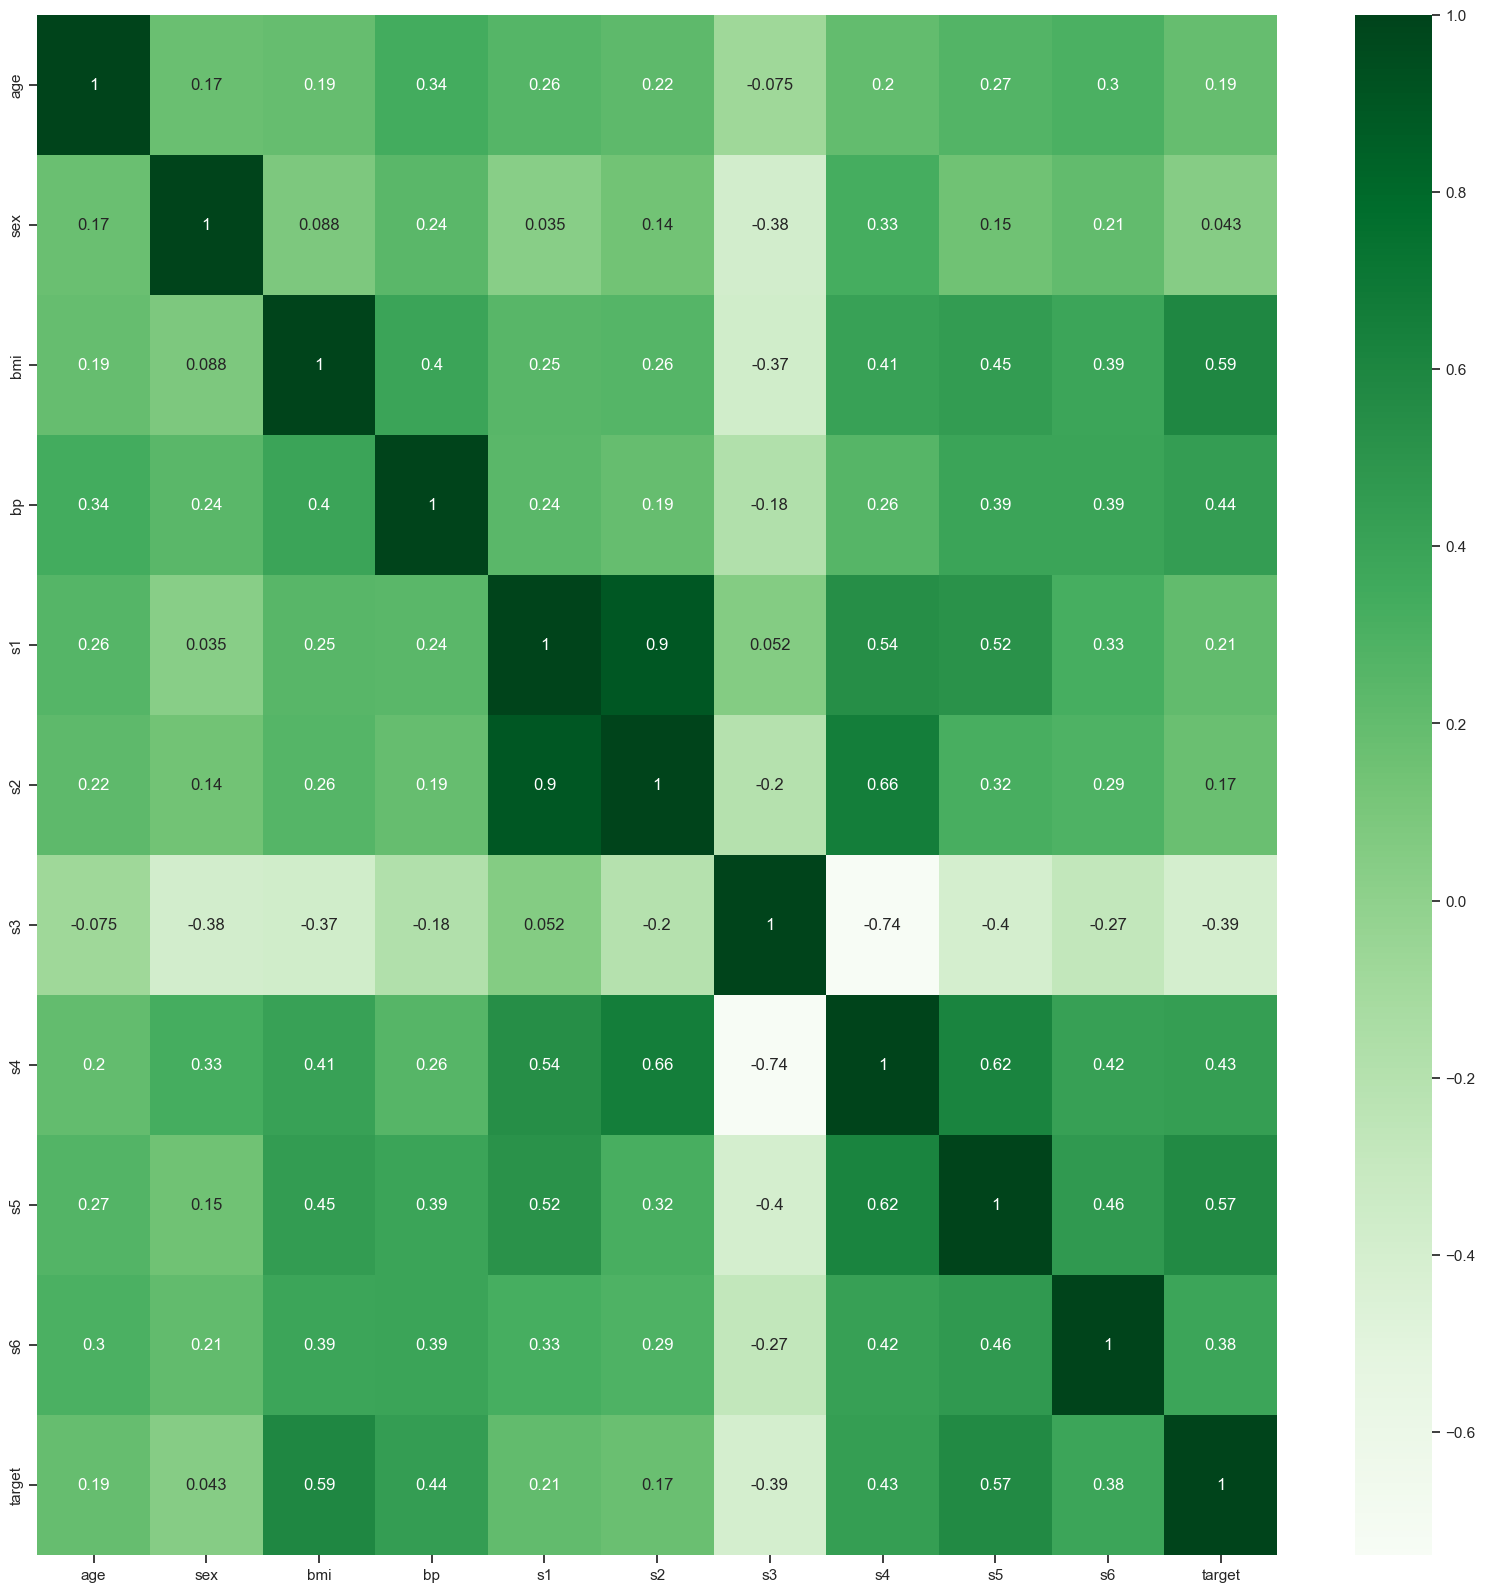

In [25]:
plt.figure(figsize=(20,20))
corr = df_diabetes.corr(method='pearson')
sns.heatmap(corr, annot=True, cmap='Greens')

The most correlated attributes to the target is bmi (0.59) and s5 (0.57). But let's find it out with the feature engineering.

Some extras visualization graphs between some attributes and target. 

array([<Axes: title={'center': '-0.044641636506989144'}>,
       <Axes: title={'center': '0.05068011873981862'}>], dtype=object)

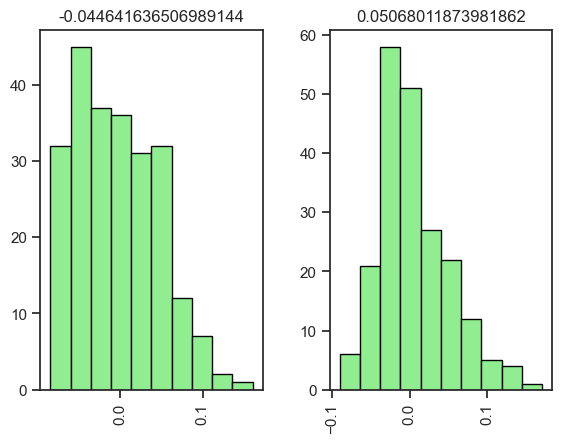

In [26]:
df_diabetes.hist(column="bmi", by="sex" , color='lightgreen', edgecolor='black')

Even though we have the histograms about sex and bmi, unfortunately we don't know which one shows which sex. 

<Axes: xlabel='bmi', ylabel='age'>

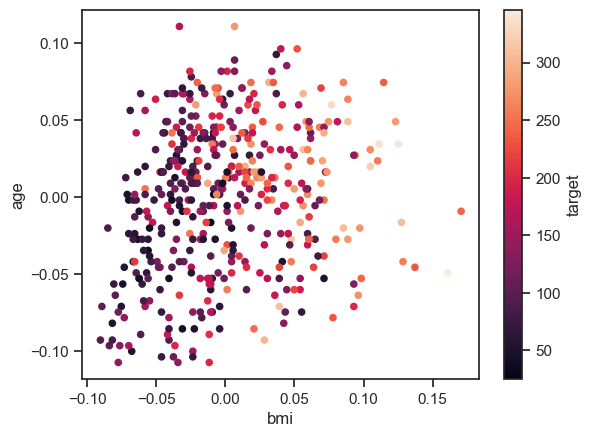

In [27]:
#plot of bmi and ages against the target 
df_diabetes.plot.scatter(x='bmi', y='age', c='target')

#### Feature engineering 

Libraries that has to be imported

In [28]:
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector

Separating the features and target

In [29]:
X = df_diabetes.drop(columns='target', axis=1 )
Y = df_diabetes['target']

In [30]:
print('Dataset of all the attributes except the target-class attribute')
print(X)

Dataset of all the attributes except the target-class attribute
          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           

In [31]:
print('Only the class attribute.')
print(Y)

Only the class attribute.
0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64


Splitting the data above into training and testing data and present the X data numbers of rows and columns 

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)


(442, 10) (353, 10) (89, 10)


Feature importance from coefficients

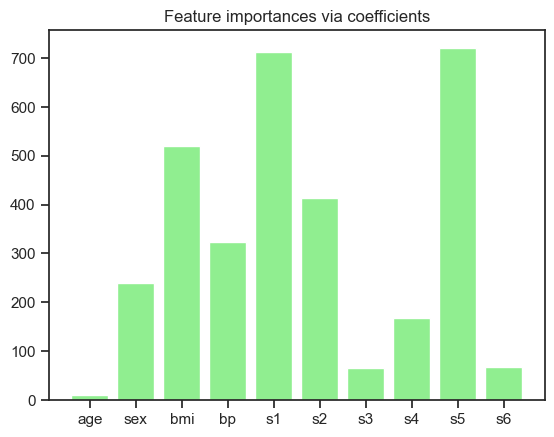

In [33]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, Y)
importance = np.abs(ridge.coef_)
feature_names = np.array(diabetes.feature_names)

plt.bar(height=importance, x=feature_names, color='lightgreen' )
plt.title("Feature importances via coefficients")
plt.show()

Essential libraries that need to be imported.

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


import matplotlib.pyplot as plt

In [35]:
# Create a list, with one item per algorithm. Each item has a name, and a classifier object.


models = []
models.append(('LR',      LinearRegression()))
models.append(('RIDGE',   Ridge()))
models.append(('LASSO',   Lasso()))
models.append(('ELASTIC', ElasticNet()))
models.append(('kNN',     KNeighborsRegressor()))
models.append(('DT',      DecisionTreeRegressor()))

In [36]:
array = df_diabetes.values
# The scoring function to use
scoring = 'neg_mean_squared_error'

In [37]:
# We are going to evaluate all classifiers, and store results in two lists:
results = []
names   = []
for name, model in models:
  kfold = KFold(n_splits=10, shuffle=True, random_state=7)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))


        LR: -2996.246920 (+/- 466.396601)
     RIDGE: -3479.830483 (+/- 566.583594)
     LASSO: -3805.311617 (+/- 486.234061)
   ELASTIC: -5992.296306 (+/- 998.511657)
       kNN: -3570.073260 (+/- 605.954103)
        DT: -5849.536667 (+/- 1873.280712)


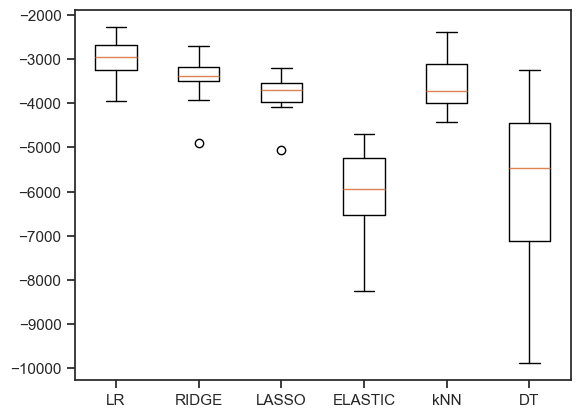

In [38]:
plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()

The model that is preferable is Linear Regression, because is the one with the least negative mean square error. That means that I choose the number that is closest to zero. But let's see if that happens with some feature engineerng, with normalization or standardization.

Selecting features based on importance

In [39]:
threshold = np.sort(importance)[-3] + 0.01

sfm = SelectFromModel(ridge, threshold=threshold).fit(X, Y)
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")

Features selected by SelectFromModel: ['s1' 's5']


In [40]:
a = ['s1', 's5']
X_feature1 = df_diabetes[a]

In [41]:
X=X_feature1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(442, 2) (353, 2) (89, 2)


In [42]:
# We are going to evaluate all classifiers, and store results in two lists:
results = []
names   = []
for name, model in models:
  kfold = KFold(n_splits=10, shuffle=True, random_state=7)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

        LR: -3971.169070 (+/- 592.013210)
     RIDGE: -4693.681340 (+/- 754.920475)
     LASSO: -4449.224850 (+/- 709.683418)
   ELASTIC: -6030.429547 (+/- 1003.358060)
       kNN: -4261.845111 (+/- 946.408255)


        DT: -7758.281587 (+/- 1809.713097)


Selecting features with Sequential Feature Selection¶

In [43]:
X = df_diabetes.drop(columns='target', axis=1 )
Y = df_diabetes['target']
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=2, direction="forward"
).fit(X, Y)

sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=2, direction="backward"
).fit(X, Y)

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)
print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
)

Features selected by forward sequential selection: ['bmi' 's5']
Features selected by backward sequential selection: ['bmi' 's5']


We also note that the features selected by SFS differ from those selected by feature importance: SFS selects bmi instead of s1. This does sound reasonable though, since bmi corresponds to the third most important feature according to the coefficients. It is quite remarkable considering that SFS makes no use of the coefficients at all.

In [44]:
a = ['bmi', 's5']
X_feature2 = df_diabetes[a]

In [45]:
X=X_feature2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(442, 2) (353, 2) (89, 2)


In [46]:
# We are going to evaluate all classifiers, and store results in two lists:
results = []
names   = []
for name, model in models:
  kfold = KFold(n_splits=10, shuffle=True, random_state=7)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

        LR: -3171.820234 (+/- 410.247481)
     RIDGE: -3862.119475 (+/- 501.306783)


     LASSO: -3800.113455 (+/- 493.141389)
   ELASTIC: -6017.024875 (+/- 999.584173)
       kNN: -3568.974978 (+/- 737.649686)
        DT: -6829.404524 (+/- 1704.144365)


Remove the most correlated attributes

In [47]:
X = df_diabetes.drop(columns='target', axis=1 )
Y = df_diabetes['target']

correlation_matrix = df_diabetes.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
X_dropped = df_diabetes.drop(columns=to_drop)

print('The attribute that was dropped was ')
print(to_drop)
X_dropped

The attribute that was dropped was 
['s2']


,age,sex,bmi,bp,s1,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,-0.028674,0.026560,0.044529,-0.025930,220.0


In [48]:
X=X_dropped
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(442, 10) (353, 10) (89, 10)


In [49]:
# We are going to evaluate all classifiers, and store results in two lists:
results = []
names   = []
for name, model in models:
  kfold = KFold(n_splits=10, shuffle=True, random_state=7)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

        LR: -0.000000 (+/- 0.000000)
     RIDGE: -0.000000 (+/- 0.000000)
     LASSO: -0.000168 (+/- 0.000035)


   ELASTIC: -0.000168 (+/- 0.000035)
       kNN: -4.815981 (+/- 8.619286)
        DT: -8.126905 (+/- 5.982475)


Standardizing Dataset

In [50]:
from sklearn.discriminant_analysis import StandardScaler
X = df_diabetes.drop(columns='target', axis=1 )
Y = df_diabetes['target']

scaler = StandardScaler()
X_stand = pd.DataFrame(scaler.fit_transform(X), columns=[f"feature_{i}" for i in range(X.shape[1])])
X_stand

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568
...,...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256040,-0.119769,-0.053957,-0.602843,-0.054499,0.655787,0.151508
438,-0.115937,1.065488,-0.334410,-1.422086,1.037341,1.664355,-0.602843,0.721302,-0.380819,0.935254
439,0.876870,1.065488,-0.334410,0.363573,-0.785107,-0.290965,-0.525441,-0.232934,-0.985649,0.325674
440,-0.956004,-0.938537,0.821235,0.025550,0.343075,0.321306,-0.602843,0.558384,0.936163,-0.545154


In [51]:
X=X_stand
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(442, 10) (353, 10) (89, 10)


In [52]:
# We are going to evaluate all classifiers, and store results in two lists:
results = []
names   = []
for name, model in models:
  kfold = KFold(n_splits=10, shuffle=True, random_state=7)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

        LR: -2996.246920 (+/- 466.396601)
     RIDGE: -2990.026891 (+/- 440.662738)
     LASSO: -2965.051335 (+/- 405.003021)


   ELASTIC: -3134.080528 (+/- 441.473135)
       kNN: -3570.073260 (+/- 605.954103)
        DT: -5751.559444 (+/- 1760.314253)


Normalized Dataset

In [53]:
norm_scaler = MinMaxScaler()
X_norm = pd.DataFrame(norm_scaler.fit_transform(X), columns=[f'feature_{i}' for i in range(X.shape[1])])
X_norm

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333
...,...,...,...,...,...,...,...,...,...,...
437,0.683333,1.0,0.421488,0.704225,0.431373,0.359562,0.259740,0.282087,0.605672,0.530303
438,0.466667,1.0,0.285124,0.183099,0.627451,0.619522,0.259740,0.423131,0.415810,0.666667
439,0.683333,1.0,0.285124,0.530563,0.318627,0.323705,0.272727,0.249647,0.305030,0.560606
440,0.283333,0.0,0.495868,0.464789,0.509804,0.416335,0.259740,0.393512,0.657026,0.409091


In [54]:
X=X_norm
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(442, 10) (353, 10) (89, 10)


In [55]:
# We are going to evaluate all classifiers, and store results in two lists:
results = []
names   = []
for name, model in models:
  kfold = KFold(n_splits=10, shuffle=True, random_state=7)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

        LR: -2996.246920 (+/- 466.396601)
     RIDGE: -2989.872650 (+/- 396.202557)
     LASSO: -3070.415667 (+/- 380.879617)


   ELASTIC: -5244.862330 (+/- 898.277079)
       kNN: -3409.507257 (+/- 599.672137)
        DT: -6011.110159 (+/- 1802.123934)


As we can see in most of the cases he winning algorithm is Linear Regression. 


Improve results with tuning for the winning algorithm

In [56]:
X = df_diabetes.drop(columns='target', axis=1 )
Y = df_diabetes['target']


Grid Search Parameter Tuning

In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), cv=5)
grid.fit(X, Y)
# print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.4823214545225417
0.0001


Random Search

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_grid = {'alpha': uniform()}
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, random_state=7, cv=5)
rsearch.fit(X, Y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

0.48227706432632944
0.0014268805627581926


Comparison between the two optimisers  

In [59]:
from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# get some data
digits = load_digits()
X, y = digits.data, digits.target

# build a classifier
clf = RandomForestClassifier(n_estimators=20)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 15.27 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.927 (std: 0.024)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 4}

Model with rank: 2
Mean validation score: 0.924 (std: 0.024)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 8}

Model with rank: 3
Mean validation score: 0.922 (std: 0.025)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 3, 'min_samples_split': 6}

